# CSCI 4022 Semester Project
# Analyzing Spotify Data with K-Means and Making Recommendations
## Bradley Sides
**Link to dataset:** https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset?resource=download


## Loading the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# For help later
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# For granular results analysis
#pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('../data/dataset.csv')

In [3]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
df.shape

(114000, 21)

In [5]:
# Take 5000 random rows to analyze

df = df.sample(5000)

In [6]:
df.shape

(5000, 21)

In [7]:
# Take a look at the genres present
genres = df['track_genre'].unique()
print(f"Unique Genres: {len(genres)}")

Unique Genres: 114


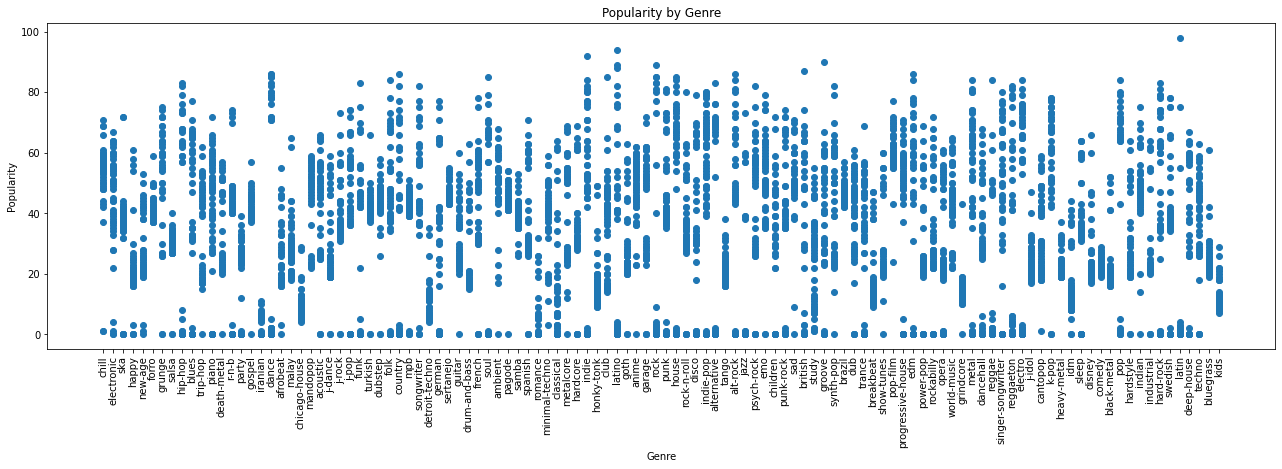

In [8]:
# Plot genres in relation to popularity
fig = plt.figure(figsize=(22, 6))
plt.title('Popularity by Genre')
plt.ylabel('Popularity')
plt.xlabel('Genre')
plt.xticks(rotation='vertical')
plt.scatter(df['track_genre'], df['popularity'])

In [9]:
# These are the top 10 most popular songs in our sample
df_sorted = df.sort_values(by='popularity', ascending=False)
df_sorted.head(10)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
67356,67356,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,...,-5.329,0,0.0364,0.5830,0.000002,0.2180,0.850,124.980,4,latin
68355,68355,6Xom58OOXk2SoU711L2IXO,Bad Bunny,Un Verano Sin Ti,Moscow Mule,94,245939,True,0.804,0.674,...,-5.453,0,0.0333,0.2940,0.000001,0.1150,0.292,99.968,4,latino
57003,57003,5XeFesFbtLpXzIVDNQP22n,Arctic Monkeys,AM,I Wanna Be Yours,92,183956,False,0.464,0.417,...,-9.345,0,0.0256,0.1360,0.022000,0.0974,0.479,67.528,4,indie
43000,43000,4zN21mbAuaD0WqtmaTZZeP,James Hype;Miggy Dela Rosa,Ferrari,Ferrari,90,186661,False,0.847,0.690,...,-7.877,0,0.0493,0.0127,0.000060,0.0526,0.692,125.004,4,groove
91254,91254,72yP0DUlWPyH8P7IoxskwN,Elton John;Britney Spears,Hold Me Closer,Hold Me Closer,89,202245,False,0.667,0.750,...,-4.602,1,0.0906,0.0746,0.000198,0.1970,0.486,126.041,4,rock
68611,68611,5jt25aFjW2kNoBqaEVaz5W,Mora;Feid,MICRODOSIS,LA INOCENTE,89,202173,True,0.757,0.789,...,-3.460,0,0.0583,0.3070,0.000000,0.0717,0.464,91.911,4,latino
68600,68600,0fea68AdmYNygeTGI4RC18,J Balvin;Bad Bunny,OASIS,LA CANCIÓN,88,242573,False,0.754,0.646,...,-5.795,1,0.3170,0.1520,0.000018,0.1080,0.429,176.089,4,latino
11014,11014,62ke5zFUJN6RvtXZgVH0F8,Paloma Faith,A Perfect Contradiction (Outsiders' Expanded E...,Only Love Can Hurt Like This,87,232893,False,0.566,0.885,...,-4.528,1,0.0818,0.0958,0.000100,0.3340,0.304,90.990,4,british
20026,20026,0ct6r3EGTcMLPtrXHDvVjc,Avicii,The Days / Nights,The Nights,86,176658,False,0.527,0.835,...,-5.298,1,0.0433,0.0166,0.000000,0.2490,0.654,125.983,4,dance
19652,19652,5uU1uuyaUIBOiiUSQG7Wl3,Morgan Wallen,You Proof,You Proof,86,157477,False,0.731,0.850,...,-4.913,1,0.0336,0.2520,0.000000,0.6050,0.644,119.706,4,country


In [10]:
# What are the most popular genres, on average?

group_genre = df.groupby('track_genre')
genre_means = group_genre['popularity'].mean()
sorted_series = genre_means.sort_values(ascending=False)

print(sorted_series)

track_genre
pop-film          60.585366
k-pop             58.684211
chill             52.214286
grunge            52.111111
emo               51.000000
                    ...    
detroit-techno    11.057143
chicago-house      9.812500
latin              6.307692
romance            5.068182
iranian            2.400000
Name: popularity, Length: 114, dtype: float64


## Exploratory Plots


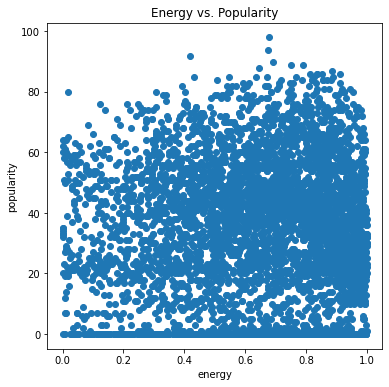

In [11]:
# Plot energy vs. Popularity
fig = plt.figure(figsize=(6, 6))
plt.title("Energy vs. Popularity")
plt.xlabel('energy')
plt.ylabel('popularity')
plt.scatter(df['energy'], df['popularity'])

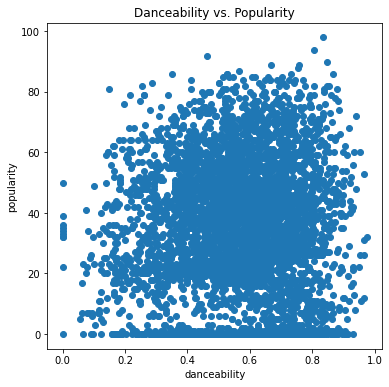

In [12]:
# Plot Danceability vs. Popularity
fig = plt.figure(figsize=(6, 6))
plt.title("Danceability vs. Popularity")
plt.xlabel('danceability')
plt.ylabel('popularity')
plt.scatter(df['danceability'], df['popularity'])

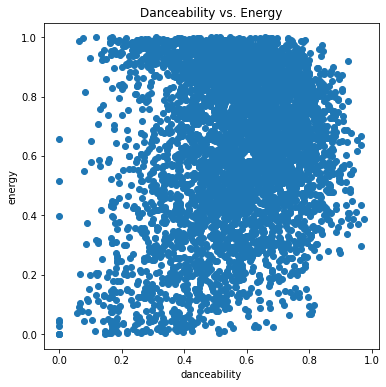

In [13]:
# Plot Danceability vs Energy
fig = plt.figure(figsize=(6, 6))
plt.title("Danceability vs. Energy")
plt.xlabel('danceability')
plt.ylabel('energy')
plt.scatter(df['danceability'], df['energy'])

Note: Danceability vs. Energy is the only plot with a strong positive linear correlation somewhat apparent. These factors seems somewhat related.

## Dimensionality Reduction

**Here, I'm going to narrow down the columns in the dataframe to the specific ones I want to look into further. Specifically, these are:  Danceability, Energy, Valence, and Tempo. These are all features that I think may play into classifying a song.**

## Feature Scaling

I'm converting everything to a scale of 0-100 (positive) to run k-means accurately later on.

In [14]:
# Create new df with only 4 columns
dfNew = df.filter(['energy', 'danceability', 'valence', 'tempo'])

In [15]:
# Use sklearn minmax scaler to make all features on the same scale
scaler = MinMaxScaler(feature_range=[0, 100])
scaled_df = scaler.fit_transform(dfNew)
dfNew = pd.DataFrame(scaled_df, columns = dfNew.columns)
dfNew

,energy,danceability,valence,tempo
0,34.533217,67.179487,61.895161,57.243015
1,63.562830,72.923077,65.120968,56.358341
2,58.457623,80.000000,95.463710,54.508567
3,97.997958,46.153846,46.270161,76.181497
4,26.625150,33.333333,38.810484,66.883557
...,...,...,...,...
4995,89.489278,54.974359,79.032258,79.470286
4996,43.742612,59.897436,51.008065,45.350575
4997,40.939753,41.538462,23.487903,54.504478
4998,99.399387,58.358974,5.020161,62.013077


In [16]:
# Make sure scaling worked properly
min_values = dfNew.min()
max_values = dfNew.max()
print(min_values)
print(max_values)

energy          0.0
danceability    0.0
valence         0.0
tempo           0.0
dtype: float64
energy          100.0
danceability    100.0
valence         100.0
tempo           100.0
dtype: float64


Now, we can be sure that the columns are all properly scaled before we run kmeans on them

## K-Means!

In [17]:
##
## Key Algorithm: k-Means implementation
##

def kmeans(df, k, tol = 1e-4):
    # Set centroids
    np.random.seed(42)
    
    # Initialize centroids - using kmeans++
    centroids = np.zeros((k, df.shape[1]))
    # Random first centroid
    first_centroid_idx = np.random.choice(df.shape[0])
    centroids[0] = df[first_centroid_idx]
    
    # Go through all remainging centroids
    for i in range(1, k):
        # Takes distances of all points to initialized centroid(s)
        distances = np.linalg.norm(df[:, np.newaxis] - centroids[:i], axis = 2)
        # Takes minimum distane from each point to centroid(s)
        min_distances = np.min(distances, axis=1)
        # Probability distribution
        probabilities = min_distances / np.sum(min_distances)
        # Picks next centroid
        next_centroid_idx = np.random.choice(df.shape[0], p = probabilities)
        # Initialize it
        centroids[i] = df[next_centroid_idx]

    
    # Max iteration = 100
    max_iter = 100
    for iteration in range(max_iter):
        
        # Get distances from each point to centroids
        distances = np.linalg.norm(df[:, np.newaxis] - centroids, axis = 2)
            
        # Assign each point to a centroid
        labels = np.argmin(distances, axis = 1)
        
        # Move centroids to new location
        new_centroids = np.array([df[labels == i].mean(axis = 0) for i in range(k)])
        
        # Convergence check
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        
        # Assign new centroids
        centroids = new_centroids
    
    return labels, centroids

In [18]:
# Function to get the sum-squared-difference
def sse(vals, centroids, labels):
    return np.sum([np.sum((vals[labels == i] - centroids[i])**2) for i in range(centroids.shape[0])])

In [19]:
# Save df as a list of lists (rows)
vals = dfNew.values
# Keep track of SSE
errs = []
# How many we want to try
num_k = range(1, 15)

# Run kmeans for different k-values
for k in num_k:
    labels, centroids = kmeans(vals, k)
    # Calculate and save SSE for each k
    err = sse(vals, centroids, labels)
    errs.append(err)

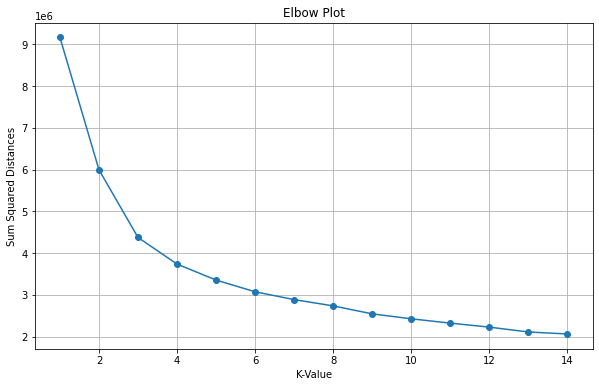

In [20]:
# Plot all results
plt.figure(figsize=(10, 6))
plt.plot(num_k, errs, 'o-')
plt.xlabel('K-Value')
plt.ylabel('Sum Squared Distances')
plt.title('Elbow Plot')
plt.grid()
plt.show()

In [21]:
# Save optimal k-value and move forward
best_k = 6
labels, centroids = kmeans(vals, best_k)

In [22]:
# Citation: https://medium.com/more-python-less-problems/principal-component-analysis-and-k-means-clustering-to-visualize-a-high-dimensional-dataset-577b2a7a5fe2
# Used Medium article to learn how to use PCA to visualize higher-dimensional clustering
pca = PCA(n_components = 2)
graph_pca = pca.fit_transform(vals)

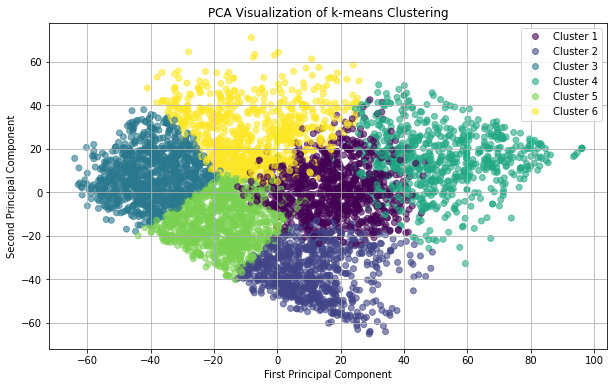

In [23]:
# Graph the PCA Visualization
plt.figure(figsize = (10, 6))
scatter = plt.scatter(graph_pca[:, 0], graph_pca[:, 1], c = labels, cmap = 'viridis', alpha = 0.6)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Visualization of k-means Clustering')
plt.legend(handles = scatter.legend_elements()[0], labels = [f'Cluster {i+1}' for i in range(best_k)])
plt.grid()
plt.show()

In [24]:
# Print cluster sizes
cluster_sizes = np.bincount(labels)
for i, size in enumerate(cluster_sizes):
    print(f"Cluster {i}: {size} data points")

Cluster 0: 921 data points
Cluster 1: 769 data points
Cluster 2: 959 data points
Cluster 3: 683 data points
Cluster 4: 907 data points
Cluster 5: 761 data points


In [25]:
# List cluster centroids
centroids_df = pd.DataFrame(centroids, columns=dfNew.columns)
print("Cluster centroids:")
print(centroids_df)

Cluster centroids:
      energy  danceability    valence      tempo
0  52.828504     63.122247  30.910410  53.228769
1  86.310222     44.696169  21.387658  60.544822
2  79.105589     70.141547  82.973591  56.511576
3  22.488129     37.707715  19.819832  47.936110
4  83.905854     57.990558  54.904173  59.134588
5  45.848755     67.566023  67.315131  52.875250


In [26]:
# Add new column of clusters to the dataframe to keep track of
dfNew['Cluster'] = labels

**Now, add song names, artists and popularity for analysis**

In [27]:
# Make a final dataset with all the numerical attributes, clusters, and now track name, artists, and popularity
dfMid = df.filter(['track_name', 'artists', 'popularity'])
# To make everything fit together
dfNew.reset_index(drop = True, inplace = True)
dfMid.reset_index(drop = True, inplace = True)
dfFinal = pd.concat([dfNew, dfMid], axis = 1)

In [28]:
dfFinal

,energy,danceability,valence,tempo,Cluster,track_name,artists,popularity
0,34.533217,67.179487,61.895161,57.243015,5,You Don't Know,Justin Park,55
1,63.562830,72.923077,65.120968,56.358341,5,Parallel 6,Four Tet,55
2,58.457623,80.000000,95.463710,54.508567,2,Var ska vi sova inatt,Perikles,40
3,97.997958,46.153846,46.270161,76.181497,4,Lockdown [Mix Cut] - Original Mix,Re-Style;Predator,19
4,26.625150,33.333333,38.810484,66.883557,3,"Tubular Bells - Opening Theme / From ""The Exor...",Mike Oldfield,3
...,...,...,...,...,...,...,...,...
4995,89.489278,54.974359,79.032258,79.470286,2,The Drummer,Red Hot Chili Peppers,68
4996,43.742612,59.897436,51.008065,45.350575,5,Vivendo por Viver,Zezé Di Camargo & Luciano,43
4997,40.939753,41.538462,23.487903,54.504478,3,Somebody Out There,A Rocket To The Moon,58
4998,99.399387,58.358974,5.020161,62.013077,1,Blah Blah Blah (Mixed),Armin van Buuren,40


In [29]:
#
# Here, I'm printing out the mean popularity, energy, danceability,
# valence, and tempo for each cluster.
#

mean_pop_0 = dfFinal.loc[dfFinal['Cluster'] == 0, 'popularity'].mean()
mean_pop_1 = dfFinal.loc[dfFinal['Cluster'] == 1, 'popularity'].mean()
mean_pop_2 = dfFinal.loc[dfFinal['Cluster'] == 2, 'popularity'].mean()
mean_pop_3 = dfFinal.loc[dfFinal['Cluster'] == 3, 'popularity'].mean()
mean_pop_4 = dfFinal.loc[dfFinal['Cluster'] == 4, 'popularity'].mean()
mean_pop_5 = dfFinal.loc[dfFinal['Cluster'] == 5, 'popularity'].mean()
print(f"Mean popularity for group 0: {mean_pop_0}")
print(f"Mean popularity for group 1: {mean_pop_1}")
print(f"Mean popularity for group 2: {mean_pop_2}")
print(f"Mean popularity for group 3: {mean_pop_3}")
print(f"Mean popularity for group 4: {mean_pop_4}")
print(f"Mean popularity for group 5: {mean_pop_5}")

print('')

mean_en_0 = dfFinal.loc[dfFinal['Cluster'] == 0, 'energy'].mean()
mean_en_1 = dfFinal.loc[dfFinal['Cluster'] == 1, 'energy'].mean()
mean_en_2 = dfFinal.loc[dfFinal['Cluster'] == 2, 'energy'].mean()
mean_en_3 = dfFinal.loc[dfFinal['Cluster'] == 3, 'energy'].mean()
mean_en_4 = dfFinal.loc[dfFinal['Cluster'] == 4, 'energy'].mean()
mean_en_5 = dfFinal.loc[dfFinal['Cluster'] == 5, 'energy'].mean()
print(f"Mean energy for group 0: {mean_en_0}")
print(f"Mean energy for group 1: {mean_en_1}")
print(f"Mean energy for group 2: {mean_en_2}")
print(f"Mean energy for group 3: {mean_en_3}")
print(f"Mean energy for group 4: {mean_en_4}")
print(f"Mean energy for group 5: {mean_en_5}")

print('')

mean_da_0 = dfFinal.loc[dfFinal['Cluster'] == 0, 'danceability'].mean()
mean_da_1 = dfFinal.loc[dfFinal['Cluster'] == 1, 'danceability'].mean()
mean_da_2 = dfFinal.loc[dfFinal['Cluster'] == 2, 'danceability'].mean()
mean_da_3 = dfFinal.loc[dfFinal['Cluster'] == 3, 'danceability'].mean()
mean_da_4 = dfFinal.loc[dfFinal['Cluster'] == 4, 'danceability'].mean()
mean_da_5 = dfFinal.loc[dfFinal['Cluster'] == 5, 'danceability'].mean()
print(f"Mean danceability for group 0: {mean_da_0}")
print(f"Mean danceability for group 1: {mean_da_1}")
print(f"Mean danceability for group 2: {mean_da_2}")
print(f"Mean danceability for group 3: {mean_da_3}")
print(f"Mean danceability for group 4: {mean_da_4}")
print(f"Mean danceability for group 5: {mean_da_5}")

print('')

mean_va_0 = dfFinal.loc[dfFinal['Cluster'] == 0, 'valence'].mean()
mean_va_1 = dfFinal.loc[dfFinal['Cluster'] == 1, 'valence'].mean()
mean_va_2 = dfFinal.loc[dfFinal['Cluster'] == 2, 'valence'].mean()
mean_va_3 = dfFinal.loc[dfFinal['Cluster'] == 3, 'valence'].mean()
mean_va_4 = dfFinal.loc[dfFinal['Cluster'] == 4, 'valence'].mean()
mean_va_5 = dfFinal.loc[dfFinal['Cluster'] == 5, 'valence'].mean()
print(f"Mean valence for group 0: {mean_va_0}")
print(f"Mean valence for group 1: {mean_va_1}")
print(f"Mean valence for group 2: {mean_va_2}")
print(f"Mean valence for group 3: {mean_va_3}")
print(f"Mean valence for group 4: {mean_va_4}")
print(f"Mean valence for group 5: {mean_va_5}")

print('')

mean_te_0 = dfFinal.loc[dfFinal['Cluster'] == 0, 'tempo'].mean()
mean_te_1 = dfFinal.loc[dfFinal['Cluster'] == 1, 'tempo'].mean()
mean_te_2 = dfFinal.loc[dfFinal['Cluster'] == 2, 'tempo'].mean()
mean_te_3 = dfFinal.loc[dfFinal['Cluster'] == 3, 'tempo'].mean()
mean_te_4 = dfFinal.loc[dfFinal['Cluster'] == 4, 'tempo'].mean()
mean_te_5 = dfFinal.loc[dfFinal['Cluster'] == 5, 'tempo'].mean()
print(f"Mean tempo for group 0: {mean_te_0}")
print(f"Mean tempo for group 1: {mean_te_1}")
print(f"Mean tempo for group 2: {mean_te_2}")
print(f"Mean tempo for group 3: {mean_te_3}")
print(f"Mean tempo for group 4: {mean_te_4}")
print(f"Mean tempo for group 5: {mean_te_5}")

Mean popularity for group 0: 37.8881199538639
Mean popularity for group 1: 30.611500701262273
Mean popularity for group 2: 30.473460721868364
Mean popularity for group 3: 29.780525502318394
Mean popularity for group 4: 33.81703775411423
Mean popularity for group 5: 33.43609022556391

Mean energy for group 0: 53.36272108330709
Mean energy for group 1: 44.798935519372826
Mean energy for group 2: 78.6694183692355
Mean energy for group 3: 21.18671089394059
Mean energy for group 4: 81.92528651990885
Mean energy for group 5: 87.32305092861056

Mean danceability for group 0: 61.10191219516796
Mean danceability for group 1: 67.2805938214348
Mean danceability for group 2: 70.33093231561439
Mean danceability for group 3: 38.886160128704766
Mean danceability for group 4: 59.7310234649214
Mean danceability for group 5: 43.318341866937345

Mean valence for group 0: 29.635073668936254
Mean valence for group 1: 67.52151857213948
Mean valence for group 2: 82.17534329840423
Mean valence for group 3: 21

There is significant spread among the energy and valence clusters. Interestingly enough, songs clustered in Group 3 with extremely high energy, also fall into the low valence cluster. Danceability follows right behind, with not much variation in tempo, and popularity seems to be pretty standard among clusters.

## Recommendations

Here, I wanted to make something that people can use to get song recommendations based on more subtle factors. Users input their preferences for each of the features, and then the recommendation system picks the closest cluster to their preferences and recommends 5 songs. Additionally, if they have a popularity preference so that it doesn't recommend obscure music, they can input that as well.

In [30]:
#
# This function takes the dot product of the user preferences with each cluster
# in order to pick the one that is most similar to their preferences. It returns
# the best fitting cluster
#

def recommend_cluster(preferences, cluster_means):
    user_profile = pd.Series(preferences, index = cluster_means.columns)

    # Take the dot product between the cluster means and the user preferences
    sim_scores = cluster_means.dot(user_profile)

    # Take note of the cluster with the highest score
    best_cluster = sim_scores.idxmax()

    return best_cluster

In [40]:
# Hold onto their answers
user_preferences = {}
print("Please enter your preferences (0 to 100) for the following song features:")

# Take input for each featrues
for feature in ['popularity', 'energy', 'danceability', 'valence', 'tempo']:
    # Save each input
    preference = int(input(f"{feature.capitalize()}: "))
    # If the input isn't in the range
    while preference > 100 or preference < 0:
        print("Invalid input. Please enter a number 0-100.")
        preference = int(input(f"{feature.capitalize()}: "))
    user_preferences[feature] = preference

# Save all cluster means in a more efficient way
cluster_means = dfFinal.groupby('Cluster').mean()

# Get the most relevant cluster
best_cluster = recommend_cluster(user_preferences, cluster_means)

print(f"Best matching cluster for the given preferences: {best_cluster}")
print('')
print("Before I give you a few songs to try, do you care how popular they are?")
pop_pref = int(input('0 for no, 1 for yes:'))
print('')
valid_choices = dfFinal[dfFinal['Cluster'] == best_cluster]
print('')

while(True):
    # If they care about popularity of the song, take input
    if(pop_pref == 1):
        print("What is the minimum popularity (0-100) you would like?")
        pop_min = int(input("Input Number: "))
        # Reduce available rows to ones with the minimum popularity met
        valid_choices = dfFinal[(dfFinal['Cluster'] == best_cluster) & (dfFinal['popularity'] > pop_min)]
    print('')   
    # As long as there are 5 songs available
    if len(valid_choices) >= 5:
        random_sample = valid_choices[['track_name', 'artists']].sample(5)
        print("5 songs chosen for your taste:")
        #print 5 random songs
        print(random_sample)
        False
        break
    else:
        print("There are less than 5 songs with your preferences, please try again and lower the popularity score")
    

Please enter your preferences (0 to 100) for the following song features:
Popularity: 0
Energy: 100
Danceability: 0
Valence: 0
Tempo: 20
Best matching cluster for the given preferences: 5

Before I give you a few songs to try, do you care how popular they are?
0 for no, 1 for yes:1


What is the minimum popularity (0-100) you would like?
Input Number: 80

5 songs chosen for your taste:
                                             track_name  \
252                                            Everlong   
1310                                   Bring Me To Life   
513                        Only Love Can Hurt Like This   
3774  Lo Siento BB:/ (with Bad Bunny & Julieta Venegas)   
3919                              Can You Feel My Heart   

                              artists  
252                      Foo Fighters  
1310                      Evanescence  
513                      Paloma Faith  
3774  Tainy;Bad Bunny;Julieta Venegas  
3919             Bring Me The Horizon  
